Cleaning Data


In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
files=glob('states*')
us_census=pd.concat((pd.read_csv(file)for file in files), ignore_index=True)
us_census.head(5)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [3]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [4]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [5]:
us_census.head().dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [6]:
us_census["Income"]=us_census["Income"].replace("\$","",regex=True)
us_census["Income"]=us_census["Income"].astype("float")
print("After the converstion of income coulmn datatype is: " , us_census["Income"].dtypes)

After the converstion of income coulmn datatype is:  float64


In [7]:
us_census["GenderPop"][0]

'2341093M_2489527F'

In [8]:

GenderPop_split = us_census["GenderPop"].str.split("_", expand=True)
us_census["Male"]= GenderPop_split[0].str.extract("(\d+)", expand=True)
us_census["Female"]= GenderPop_split[1].str.extract("(\d+)", expand=True)
us_census["Male"]=pd.to_numeric(us_census["Male"])
us_census["Female"]=pd.to_numeric(us_census["Female"])


In [9]:
us_census.drop(["GenderPop","Unnamed: 0"], axis=1)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135,19334329.0
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667,2630239.0
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667,2630239.0
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607,1841615.0
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413,478041.0
9,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674,340810.0


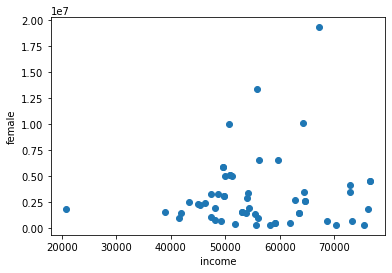

In [10]:
x=us_census["Income"]
y=us_census["Female"]
plt.scatter(x,y)
plt.xlabel("income")
plt.ylabel("female")
plt.show()

In [11]:
Female_null_values=us_census["Female"][us_census["Female"].isnull()]
Female_null_values

23   NaN
24   NaN
31   NaN
Name: Female, dtype: float64

In [12]:
Total_Pop=us_census["TotalPop"]-us_census["Male"]
us_census["Female"]=us_census["Female"].fillna(value=Total_Pop)
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607,1841615.0
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413,478041.0
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674,340810.0


In [13]:
Duplicated_row=us_census[us_census.duplicated()]
us_census.drop_duplicates(keep="first", inplace=True)



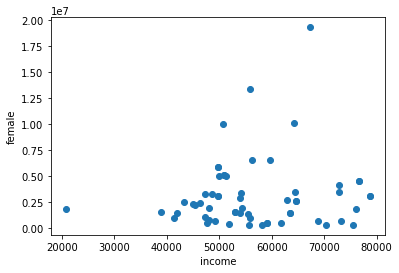

In [14]:
x=us_census["Income"]
y=us_census["Female"]
plt.scatter(x,y)
plt.xlabel("income")
plt.ylabel("female")
plt.show()

In [15]:
us_census = us_census.replace('%*','',regex=True)

In [16]:
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]] =us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].apply(pd.to_numeric)
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].fillna(0)

,Hispanic,White,Black,Native,Asian,Pacific
0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354
1,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683
2,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632
3,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861
4,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410
5,20.784380,69.895572,3.546377,0.573833,2.661997,0.000000
6,20.784380,69.895572,3.546377,0.573833,2.661997,0.000000
7,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599
8,8.824766,64.632710,20.743925,0.259813,3.268692,0.000000
9,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609


<AxesSubplot:>

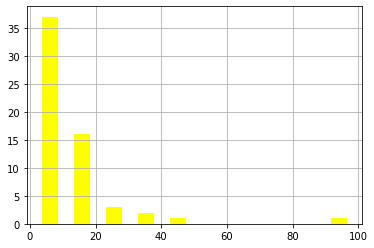

In [17]:
us_census['Hispanic'].hist(rwidth=0.50,color='yellow')


<AxesSubplot:>

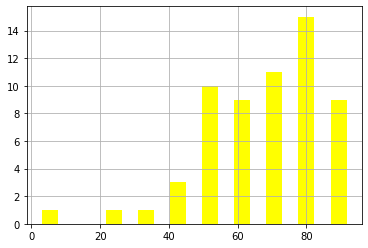

In [18]:
us_census['White'].hist(rwidth=0.50,color='yellow')

<AxesSubplot:>

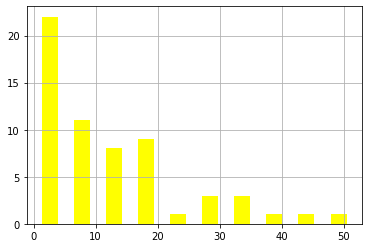

In [19]:
us_census['Black'].hist(rwidth=0.50,color='yellow')

<AxesSubplot:>

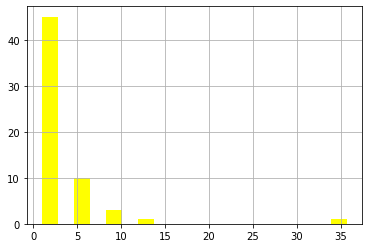

In [20]:
us_census['Asian'].hist(rwidth=0.50,color='yellow')

<AxesSubplot:>

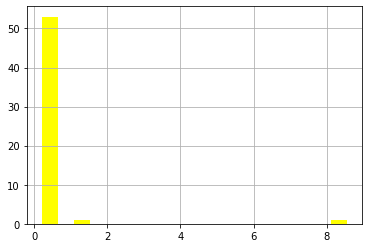

In [21]:
us_census['Pacific'].hist(rwidth=0.50,color='yellow')

<AxesSubplot:>

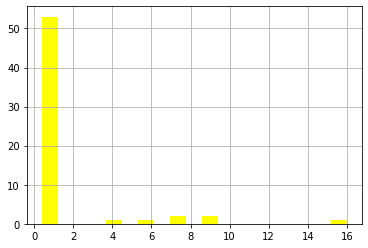

In [22]:
us_census['Native'].hist(rwidth=0.50,color='yellow')